In [12]:
from tree_sitter import Language, Parser
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
code = """
import numpy as np

def perform_bernoulli_trials(n, p):

    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success
"""

In [45]:
code_2 = """
import numpy as np

def perform_bernoulli_trials(n, p):

    # Initialize number of successes: n_success
    n_success = 0

    return n_success
"""

-------------------------------

In [13]:
PY_LANGUAGE = Language('./build/my-languages.so', 'python')
python_parser = Parser()
python_parser.set_language(PY_LANGUAGE)

In [14]:
def parse_py(code):
    
    # get a tree
    tree = python_parser.parse(bytes(code, "utf8"))

    # traverse tree to get nodes & edges
    G = nx.Graph()
    
    G = bfs_tree_traverser(tree.root_node, G)
    return G

In [15]:
def bfs_tree_traverser(root_node, G):
    # node_id = id of current node being traversed
    # parent_id = id of the parent of the current node
    node_id, parent_id = 0, 0
    # lists to queue the nodes in order and identify already visited nodes
    visited, queue = [], []
    
    visited.append(root_node)
    queue.append(root_node)
    
    # add root_node to the graph
    G.add_node(0, type=root_node.type, text=root_node.text, children=root_node.children, parent=root_node.parent)
    
    # loop to visit each node
    while queue:          
        node = queue.pop(0) 
        
        for child_node in node.children:
            if child_node not in visited:
                node_id += 1
                # add child node to graph
                G.add_node(node_id, type=child_node.type, text=child_node.text, children=child_node.children, parent=child_node.parent, parent_id=parent_id)
                # add edge between parent_node and child_node
                G.add_edge(parent_id, node_id)
                
                visited.append(child_node)
                queue.append(child_node)
        
        # set parent_id to the id of the next node in queue
        parent_id = parent_id + 1
        
    return G

In [ ]:
G = parse_py(code_2)

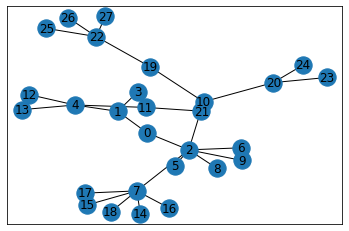

In [47]:
nx.draw_networkx(G)
plt.show()

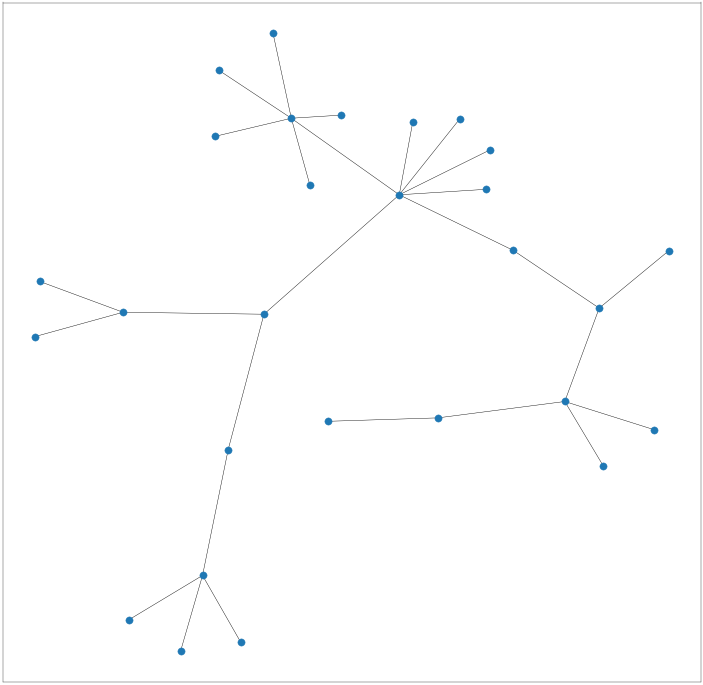

In [55]:
fig = plt.figure(1, figsize=(30, 30), dpi=30)
nx.draw_networkx(G, with_labels=False)
plt.show()